In [7]:
#imports
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.signal as signal #signal processing stuff (e.g. filters, hilbert transform, etc.)
import scipy
import struct
import os
#plotting!
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import nelpy.plotting as npl
import nelpy.io.trodes as neltro
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
#nelpy!
import nelpy as nel
import nelpy.plotting as npl
#make the svg
import svgutils.transform as sg
import sys
from IPython.display import SVG, display, Image
sns.set(rc={'figure.figsize': (12, 4),'lines.linewidth': 1, 'font.size': 18, 'axes.labelsize': 16, 'axes.titlesize':18, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')
sns.set_color_codes(palette='colorblind')
#plots show up within jupyter for matplotlib
%matplotlib inline 

# Load up data and generate figures!

In [8]:
sigmuhz = np.arange(1.5,6.25,0.25)
detectionLatencyCalc = []
relativeDetectionLatencyCalc =[]
fpRateCalc = []
tpRateCalc = []
# fpPercentCalc = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc.append(np.loadtxt(OPENME))
detectionLatencyCalc = np.asarray(detectionLatencyCalc)
relativeDetectionLatencyCalc = np.asarray(relativeDetectionLatencyCalc)
fpRateCalc = np.asarray(fpRateCalc)
tpRateCalc = np.asarray(tpRateCalc)
# fpPercentCalc = np.asarray(fpPercentCalc)

detectionLatencyCalc2 = []
relativeDetectionLatencyCalc2 = []
fpRateCalc2 = []
tpRateCalc2 = []
# fpPercentCalc2 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc2.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc2.append(np.loadtxt(OPENME))
detectionLatencyCalc2 = np.asarray(detectionLatencyCalc2)
relativeDetectionLatencyCalc2 = np.asarray(relativeDetectionLatencyCalc2)
fpRateCalc2 = np.asarray(fpRateCalc2)
tpRateCalc2 = np.asarray(tpRateCalc2)
# fpPercentCalc2 = np.asarray(fpPercentCalc2)

detectionLatencyCalc1 = []
relativeDetectionLatencyCalc1 = []
fpRateCalc1 = []
tpRateCalc1 = []
# fpPercentCalc1 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc1.append(np.loadtxt(OPENME)[0:1000])
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc1.append(np.loadtxt(OPENME)[0:1000])
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc1.append(np.loadtxt(OPENME)[0:1000])
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc1.append(np.loadtxt(OPENME)[0:1000])
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc1.append(np.loadtxt(OPENME))
detectionLatencyCalc1 = np.asarray(detectionLatencyCalc1)
relativeDetectionLatencyCalc1 = np.asarray(relativeDetectionLatencyCalc1)
fpRateCalc1 = np.asarray(fpRateCalc1)
tpRateCalc1 = np.asarray(tpRateCalc1)
# fpPercentCalc1 = np.asarray(fpPercentCalc1)

100%|██████████| 19/19 [00:00<00:00, 58.79it/s]


## Paper

In [9]:
tpRateCalc1 *= 100
relativeDetectionLatencyCalc1 *= 100

In [10]:
sns.set(rc={'figure.figsize': (1.75,1.75),'lines.linewidth': 1, 'font.size': 9.6, 'axes.labelsize': 9.6, 'axes.titlesize':9.6, 'legend.fontsize': 6.4, 'ytick.labelsize': 8, 'xtick.labelsize': 8, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
saveFigs = True

tpRateLim = [75,103]
thresholdLim = [1.25,6.5]
detectionLatencyLim = [25,75]
fsRateLim = [-4,90]
alfa=0.1
SINGLECHANNELCOLOR = 'k'

In [11]:
def tsplot(ax, data=None,x=None,alpha_fill=0.2,axis=1,**kw):
    if x is None:
        raise AttributeError("x must be passed in!")
    if data is None:
        raise AttributeError("need data!")
    est = np.mean(data, axis=axis)
    sd = 2*np.std(data, axis=axis)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=alpha_fill, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

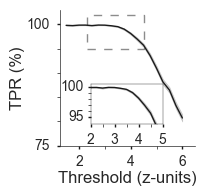

In [19]:
#TP RATE vs THRESHOLD

#main plot
ax = plt.gca()
tsplot(ax,data=tpRateCalc1,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
plt.xlabel("Threshold (z-units)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(thresholdLim)

#inset location
ax.add_patch(
    patches.Rectangle(
        (2.3,95), #(x,y)
        4.5-2.3, #width
        102-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

#inset
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.84, 0.365),
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
tsplot(axins,data=tpRateCalc1,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
axins.set_ylim(95,102)
axins.set_xlim(2.3,4.5)
axins.set_xticks(np.arange(2,4.5,1))
axins.set_yticks(np.arange(94,102,2))
#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]
#ticks
plt.minorticks_on()

axins.set_xlim(2.3,5)
axins.set_xticks(np.arange(2,6,1))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(90,100.5)
axins.set_yticks(np.arange(95,102,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpThresh.svg',transparent=True)
plt.show()

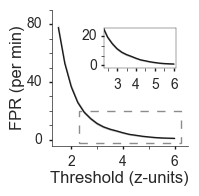

In [131]:
#FALSE STIM RATE vs THRESHOLD
#main plot
ax = plt.gca()
tsplot(ax,data=fpRateCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
plt.xlabel("Threshold (z-units)")
plt.ylabel("FPR (per min)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(fsRateLim)
plt.xlim(thresholdLim)

#mark inset
ax.add_patch(
    patches.Rectangle(
        (2.3,-2), #(x,y)
        6.25-2.3, #width
        20+2,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

#inset
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.96, 0.68), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
tsplot(axins,data=fpRateCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
axins.set_ylim(-2,20)
axins.set_xlim(2.3,6.25)
axins.set_xticks(np.arange(3,6.25,1))

#ticks!
plt.minorticks_on()

axins.set_xlim(2.3,6.1)
axins.set_xticks(np.arange(3,6.1,1))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(-2,25)
axins.set_yticks(np.arange(0,26,20))
minorLocator = AutoMinorLocator(3)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fpThresh.svg',transparent=True)
plt.show()

/home/shayok/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.


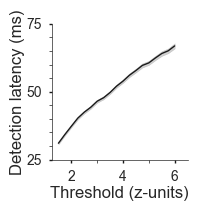

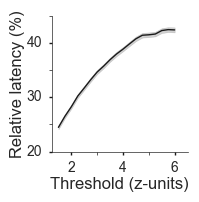

In [42]:
#DETECTION LATENCY vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=detectionLatencyCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
plt.xlabel("Threshold (z-units)")
plt.ylabel("Detection latency (ms)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(25,76,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.xlim(thresholdLim)
plt.ylim(detectionLatencyLim)

plt.legend(loc='lower right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latThresh.svg',transparent=True)
plt.show()

#RELATIVE DETECTION LATENCY vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=relativeDetectionLatencyCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
plt.xlabel("Threshold (z-units)")
plt.ylabel("Relative latency (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(20,46,10))
minorLocator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

# plt.ylim([20,60])
plt.xlim(thresholdLim)
plt.legend(loc='lower right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/relativeLatThresh.svg',transparent=True)
plt.show()

In [43]:
#calculate 2 standard error curves
est_fpr = np.mean(fpRateCalc1,axis=1)
sd_fpr = 2*np.std(fpRateCalc1,axis=1)
cis_fpr = (est_fpr - sd_fpr, est_fpr + sd_fpr)

est_tpr = np.mean(tpRateCalc1,axis=1)
sd_tpr = 2*np.std(tpRateCalc1,axis=1)
cis_tpr = (est_tpr - sd_tpr, est_tpr + sd_tpr)

est_lat = np.mean(detectionLatencyCalc1,axis=1)
sd_lat = 2*np.std(detectionLatencyCalc1,axis=1)
cis_lat = (est_lat - sd_lat, est_lat + sd_lat)

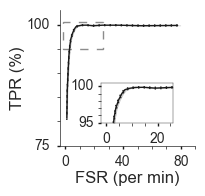

In [78]:
#TP vs FALSE STIM RATE
ax = plt.gca()
plt.plot(est_fpr,est_tpr,color='k')
plt.plot(est_fpr,cis_tpr[0],linestyle=':',color='k')
plt.plot(est_fpr,cis_tpr[1],linestyle=':',color='k')
plt.fill_betweenx(est_tpr,cis_fpr[0],cis_fpr[1],alpha=0.2,color='k')

plt.xlabel("FSR (per min)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(fsRateLim)
# mark_inset
ax.add_patch(
    patches.Rectangle(
        (-2,95), #(x,y)
        26+2, #width
        100.5-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.9, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )

axins.plot(est_fpr,est_tpr,color='k')
axins.plot(est_fpr,cis_tpr[0],linestyle=':',color='k')
axins.plot(est_fpr,cis_tpr[1],linestyle=':',color='k')
axins.fill_betweenx(est_tpr,cis_fpr[0],cis_fpr[1],alpha=0.2,color='k')

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(-2,26)
axins.set_xticks(np.arange(0,25,20))
minorLocator = AutoMinorLocator(4)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(95,100.5)
axins.set_yticks(np.arange(95,100.5,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpFsr.svg',transparent=True)
plt.show()

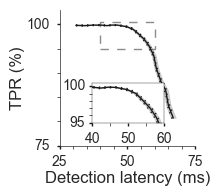

In [92]:
# TP vs DETECTION LATENCY
ax = plt.gca()
plt.plot(est_lat,est_tpr,color='k')
plt.plot(est_lat,cis_tpr[0],linestyle=':',color='k')
plt.plot(est_lat,cis_tpr[1],linestyle=':',color='k')
plt.fill_betweenx(est_tpr,cis_lat[0],cis_lat[1],alpha=0.2,color='k')

plt.xlabel("Detection latency (ms)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks 
ax.set_xticks(np.arange(25,76,25))
minorLocator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(detectionLatencyLim)

#zoom 
ax.add_patch(
    patches.Rectangle(
        (40,95), #(x,y)
        60-40, #width
        100.5-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.85, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )

axins.plot(est_lat,est_tpr,color='k')
axins.plot(est_lat,cis_tpr[0],linestyle=':',color='k')
axins.plot(est_lat,cis_tpr[1],linestyle=':',color='k')
axins.fill_betweenx(est_tpr,cis_lat[0],cis_lat[1],alpha=0.2,color='k')

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(40,60)
axins.set_xticks(np.arange(40,61,10))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(95,100.5)
axins.set_yticks(np.arange(95,100.5,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latTP.svg',transparent=True)
plt.show()

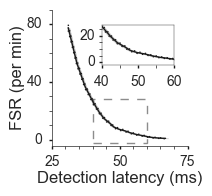

In [104]:
# FP STIM RATE vs DETECTION LATENCY
ax = plt.gca()
plt.plot(est_lat,est_fpr,color='k')
plt.plot(est_lat,cis_fpr[0],linestyle=':',color='k')
plt.plot(est_lat,cis_fpr[1],linestyle=':',color='k')
plt.fill_betweenx(est_fpr,cis_lat[0],cis_lat[1],alpha=0.2,color='k')

plt.xlabel("Detection latency (ms)")
plt.ylabel("FSR (per min)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks 
ax.set_xticks(np.arange(25,76,25))
minorLocator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(fsRateLim)
plt.xlim(detectionLatencyLim)

#zoom
ax.add_patch(
    patches.Rectangle(
        (40,-2), #(x,y)
        60-40, #width
        28+2,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.95, 0.7), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )

axins.plot(est_lat,est_fpr,color='k')
axins.plot(est_lat,cis_fpr[0],linestyle=':',color='k')
axins.plot(est_lat,cis_fpr[1],linestyle=':',color='k')
axins.fill_betweenx(est_fpr,cis_lat[0],cis_lat[1],alpha=0.2,color='k')

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(40,60)
axins.set_xticks(np.arange(40,61,10))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(-2,28)
axins.set_yticks(np.arange(0,28,20))
minorLocator = AutoMinorLocator(4)
axins.yaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latFPStim.svg',transparent=True)
plt.show()

# Final Figure!

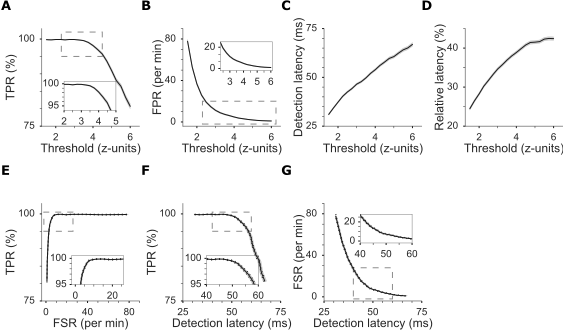

In [133]:
#create new SVG figure
fig = sg.SVGFigure("6.25in", "3.67in")

#load matplotlib-generated figures
tpThresh = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpThresh.svg")
fsrThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fpThresh.svg')
relDetThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/relativeLatThresh.svg')
latThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latThresh.svg')
tpLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latTP.svg')
fsrLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latFPStim.svg')
tpFsr = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpFsr.svg')

#get the plot objects
##Top Panel
tpThreshPlot1 = tpThresh.getroot()
fsrThreshPlot2 = fsrThresh.getroot()
relDetThreshPlot4 = relDetThresh.getroot()
latThreshPlot3 = latThresh.getroot()

plotspacing = 141
plotInitLoc = 26
plotVerticalDisplacement = 16
plotSecondRow = 175+16
textspacing = 140
textInitLoc = 1
textVerticalDisplacement = 10
textSecondRow = 175

tpThreshPlot1.moveto(plotInitLoc, plotVerticalDisplacement, scale=1)
fsrThreshPlot2.moveto(plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)
latThreshPlot3.moveto(plotspacing+plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)
relDetThreshPlot4.moveto(plotspacing+plotspacing+plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)

##Bottom Panel
tpLatPlot1 = tpLat.getroot()
fsrLatPlot2 = fsrLat.getroot()
tpFsrPlot3 = tpFsr.getroot()
tpFsrPlot3.moveto(plotInitLoc, plotSecondRow, scale=1)
tpLatPlot1.moveto(plotspacing+plotInitLoc, plotSecondRow, scale=1)
fsrLatPlot2.moveto(plotspacing+plotspacing+plotInitLoc, plotSecondRow, scale=1)


#add text labels
##Top :Panel
txt1 = sg.TextElement(1,textVerticalDisplacement, "A", size=13, weight="bold")
txt2 = sg.TextElement(textspacing+textInitLoc,textVerticalDisplacement, "B", size=13, weight="bold")
txt3 = sg.TextElement(textspacing+textspacing+textInitLoc,textVerticalDisplacement,"C", size=13, weight='bold')
txt4 = sg.TextElement(textspacing+textspacing+textspacing+textInitLoc,textVerticalDisplacement,"D", size=13, weight='bold')
##Middle :Panel
txt5 = sg.TextElement(1,textSecondRow, "E", size=13, weight="bold")
txt6 = sg.TextElement(textspacing+textInitLoc,textSecondRow, "F", size=13, weight="bold")
txt7 = sg.TextElement(textspacing+textspacing+textInitLoc,textSecondRow,"G", size=13, weight='bold')


# append plots and labels to figure
fig.append([tpThreshPlot1, fsrThreshPlot2, latThreshPlot3, relDetThreshPlot4, tpLatPlot1, fsrLatPlot2, tpFsrPlot3])
fig.append([txt1, txt2, txt3, txt4, txt5, txt6, txt7,])


fig.save("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")
os.system("inkscape --export-pdf=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.pdf /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")
os.system("inkscape --export-png=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.png /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")
display(Image(filename='/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.png'))